In [ ]:
#Carregar as bibliotecas que serão utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Carregar base de dados e verificar informações da base
dados = pd.read_csv('/content/drive/MyDrive/Cópia de RD202404.csv', sep=';', low_memory=False)

In [ ]:
dados.shape

(1220168, 113)

In [ ]:
dados_filtrados

In [ ]:
pd.options.display.max_info_columns = 113
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220168 entries, 0 to 1220167
Data columns (total 113 columns):
 #    Column      Non-Null Count    Dtype  
---   ------      --------------    -----  
 0    UF_ZI       1220168 non-null  int64  
 1    ANO_CMPT    1220168 non-null  int64  
 2    MES_CMPT    1220168 non-null  int64  
 3    ESPEC       1220168 non-null  int64  
 4    CGC_HOSP    906782 non-null   float64
 5    N_AIH       1220168 non-null  int64  
 6    IDENT       1220168 non-null  int64  
 7    CEP         1220168 non-null  int64  
 8    MUNIC_RES   1220168 non-null  int64  
 9    NASC        1220168 non-null  int64  
 10   SEXO        1220168 non-null  int64  
 11   UTI_MES_IN  1220168 non-null  int64  
 12   UTI_MES_AN  1220168 non-null  int64  
 13   UTI_MES_AL  1220168 non-null  int64  
 14   UTI_MES_TO  1220168 non-null  int64  
 15   MARCA_UTI   1220168 non-null  int64  
 16   UTI_INT_IN  1220168 non-null  int64  
 17   UTI_INT_AN  1220168 non-null  int64  
 18   

In [ ]:
dados

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,...,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
0,120000,2024,4,3,4.034526e+12,1224100201423,1,69970000,120060,19970918,...,NaN,0,0,0,0,0,0,0,0,0
1,120000,2024,4,2,4.034526e+12,1224100162714,1,69985000,120042,20031024,...,NaN,0,0,0,0,0,0,0,0,0
2,120000,2024,4,2,4.034526e+12,1224100162901,1,69990000,120033,20070111,...,NaN,0,0,0,0,0,0,0,0,0
3,120000,2024,4,3,4.034526e+12,1224100100652,1,69990000,120033,19730304,...,NaN,0,0,0,0,0,0,0,0,0
4,120000,2024,4,3,4.034526e+12,1224100100685,1,69990000,120033,19461009,...,NaN,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220163,172120,2024,4,3,NaN,1724100353085,1,77900000,172120,19920101,...,NaN,0,0,0,0,0,0,0,0,0
1220164,172120,2024,4,3,NaN,1724100353096,1,77900000,172120,20210417,...,NaN,0,0,0,0,0,0,0,0,0
1220165,172120,2024,4,3,NaN,1724100353107,1,77900000,172120,20210714,...,NaN,0,0,0,0,0,0,0,0,0
1220166,172120,2024,4,3,NaN,1724100353118,1,77900000,172120,19980922,...,NaN,0,0,0,0,0,0,0,0,0


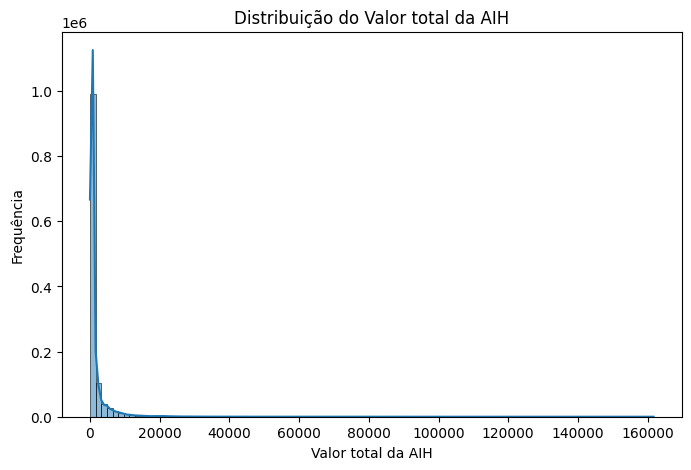

In [ ]:
# Distribuição dos custos médicos
plt.figure(figsize=(8, 5))
sns.histplot(dados['VAL_TOT'], bins=100, kde=True)
plt.title("Distribuição do Valor total da AIH")
plt.xlabel("Valor total da AIH")
plt.ylabel("Frequência")
plt.show()

<Axes: xlabel='VAL_TOT'>

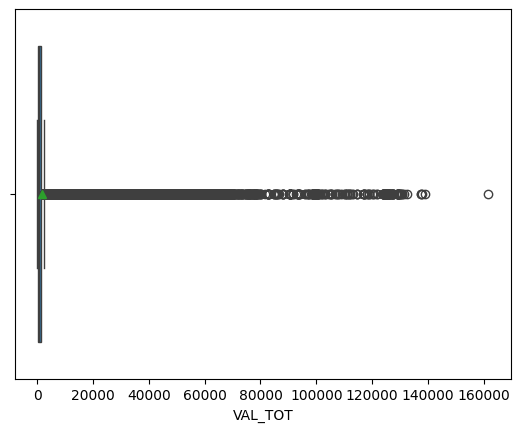

In [ ]:
sns.boxplot(x = dados['VAL_TOT'], showmeans=True)

In [ ]:
dados['VAL_TOT'].describe()

,VAL_TOT
count,1.220168e+06
mean,1.605456e+03
std,3.953528e+03
min,0.000000e+00
25%,3.448700e+02
50%,6.304200e+02
75%,1.140720e+03
max,1.617047e+05


In [ ]:
# Calculando intervalo interquartilico
Q1 = dados['VAL_TOT'].quantile(0.25)
Q3 = dados['VAL_TOT'].quantile(0.75)
AIQ = Q3 - Q1

# Calcular o limite superior
limite_superior = Q3 + 1.5 * AIQ
limite_superior


2334.495

In [ ]:
# Fazer o subset do DataFrame
dados_inf = dados[dados['VAL_TOT'] <= limite_superior]


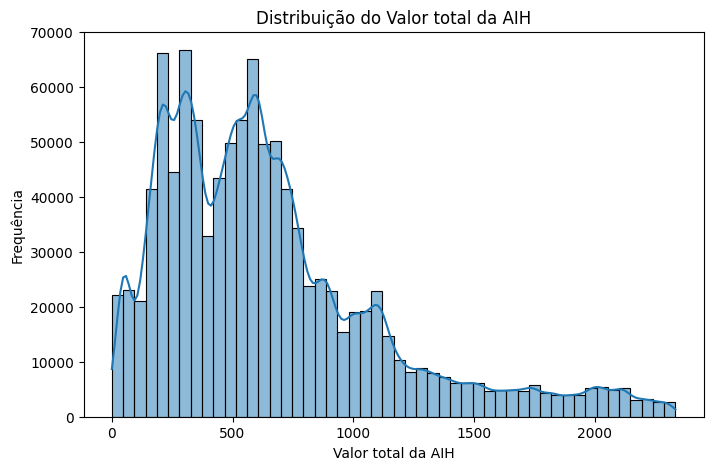

In [ ]:
# Distribuição dos custos médicos
plt.figure(figsize=(8, 5))
sns.histplot(dados_inf['VAL_TOT'], bins=50, kde=True)
plt.title("Distribuição do Valor total da AIH")
plt.xlabel("Valor total da AIH")
plt.ylabel("Frequência")
plt.show()

<Axes: xlabel='VAL_TOT'>

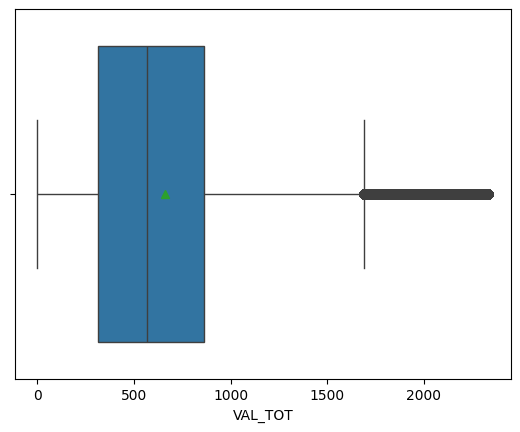

In [ ]:
sns.boxplot(x = dados_inf['VAL_TOT'], showmeans=True)

In [ ]:
dados_inf['VAL_TOT'].describe()

,VAL_TOT
count,1.056601e+06
mean,6.624566e+02
std,4.749730e+02
min,0.000000e+00
25%,3.117600e+02
50%,5.679500e+02
75%,8.634400e+02
max,2.334430e+03


In [ ]:
dados_inf.loc[:, 'UF'] = dados_inf['UF_ZI'].astype(str).str.slice(0, 2).astype(int)

<ipython-input-97-af4454079ea1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_inf.loc[:, 'UF'] = dados_inf['UF_ZI'].astype(str).str.slice(0, 2).astype(int)


In [ ]:
dados_inf['UF']

,UF
0,12
1,12
2,12
3,12
4,12
...,...
1220163,17
1220164,17
1220165,17
1220166,17


In [ ]:
# Definindo os grupos de UFs por região
regioes = {
    'N': [11, 12, 13, 14, 15, 16, 17],       # Norte
    'NE': [21, 22, 23, 24, 25, 26, 27, 28, 29], # Nordeste
    'CO': [50, 51, 52, 53],                    # Centro-Oeste
    'SD': [31, 32, 33, 35],                    # Sudeste
    'S': [41, 42, 43]                         # Sul
}

In [ ]:
# Mapeia cada UF para a sua região
regiao_por_uf = {uf: regiao for regiao, ufs in regioes.items() for uf in ufs}

In [ ]:
# Mapeando a coluna 'UF' para a nova coluna 'Regiao'
dados_inf['Regiao'] = dados_inf['UF'].map(regiao_por_uf)

<ipython-input-101-78e60010fe0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_inf['Regiao'] = dados_inf['UF'].map(regiao_por_uf)


In [ ]:
dados_inf['Regiao'].value_counts()

,count
Regiao,
SD,415453
NE,286779
S,172956
N,91404
CO,90009


In [ ]:
dados_inf['DIAG_PRINC'].value_counts()

,count
DIAG_PRINC,
O800,54249
A90,33629
Z302,25691
J189,25182
N390,16737
...,...
L404,1
S448,1
G02,1


In [ ]:
pd.set_option('display.max_rows', 15)
dados_inf['PROC_REA'].value_counts()

,count
PROC_REA,
310010039,61745
303140151,57731
411010034,50937
303010010,32399
301060088,25516
...,...
406020345,1
409060291,1
408050071,1


In [ ]:
df['COMPLEX'].value_counts()

,count
COMPLEX,
2,1018150
3,38451


In [ ]:
df['CAR_INT'].value_counts()

,count
CAR_INT,
2,788031
1,263251
6,3003
5,2316


In [ ]:
df = dados_inf[['VAL_TOT', 'IDADE', 'DIAS_PERM', 'RACA_COR', 'COMPLEX', 'CAR_INT', 'Regiao' ]]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1056601 entries, 0 to 1220167
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   VAL_TOT    float64
 1   IDADE      int64  
 2   DIAS_PERM  int64  
 3   RACA_COR   int64  
 4   COMPLEX    int64  
 5   CAR_INT    int64  
 6   Regiao     object 
dtypes: float64(1), int64(5), object(1)
memory usage: 64.5+ MB


In [ ]:
df['RACA_COR'] = df['RACA_COR'].astype('object')
df['COMPLEX'] = df['COMPLEX'].astype('object')
df['CAR_INT'] = df['CAR_INT'].astype('object')

<ipython-input-110-f3b3c3729c11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RACA_COR'] = df['RACA_COR'].astype('object')
<ipython-input-110-f3b3c3729c11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['COMPLEX'] = df['COMPLEX'].astype('object')
<ipython-input-110-f3b3c3729c11>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1056601 entries, 0 to 1220167
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   VAL_TOT    float64
 1   IDADE      int64  
 2   DIAS_PERM  int64  
 3   RACA_COR   object 
 4   COMPLEX    object 
 5   CAR_INT    object 
 6   Regiao     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 64.5+ MB


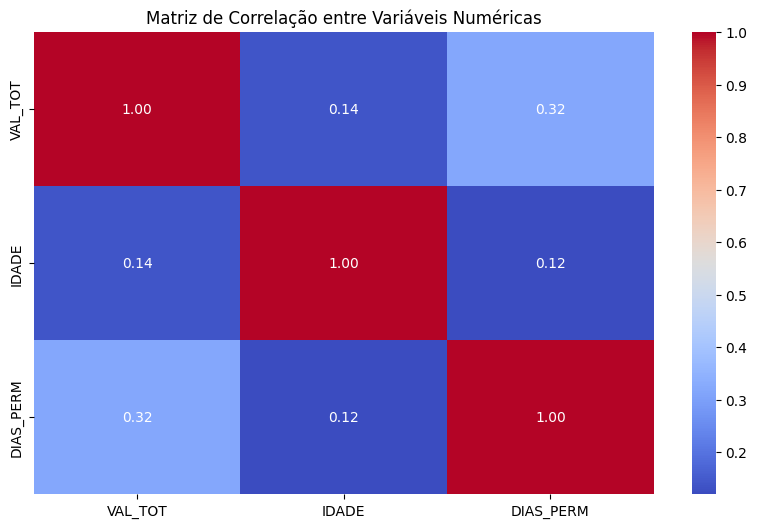

In [ ]:
# Matriz de correlação para variáveis numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()

In [ ]:
# Aplicar One-Hot Encoding nas variáveis categóricas
dados_encoded = pd.get_dummies(df, columns=['RACA_COR', 'COMPLEX', 'CAR_INT', 'Regiao'], drop_first=True,dtype='int')

dados_encoded.head()

,VAL_TOT,IDADE,DIAS_PERM,RACA_COR_2,RACA_COR_3,RACA_COR_4,RACA_COR_5,RACA_COR_99,COMPLEX_3,CAR_INT_2,CAR_INT_5,CAR_INT_6,Regiao_N,Regiao_NE,Regiao_S,Regiao_SD
0,52.22,26,1,0,0,1,0,0,0,0,0,0,1,0,0,0
1,452.40,20,1,0,1,0,0,0,0,0,0,0,1,0,0,0
2,459.40,17,2,0,1,0,0,0,0,0,0,0,1,0,0,0
3,234.68,51,2,0,1,0,0,0,0,0,0,0,1,0,0,0
4,250.68,77,4,0,1,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Importar a função necessária
from sklearn.model_selection import train_test_split

In [ ]:
dados_encoded.columns

Index(['VAL_TOT', 'IDADE', 'DIAS_PERM', 'RACA_COR_2', 'RACA_COR_3',
       'RACA_COR_4', 'RACA_COR_5', 'RACA_COR_99', 'COMPLEX_3', 'CAR_INT_2',
       'CAR_INT_5', 'CAR_INT_6', 'Regiao_N', 'Regiao_NE', 'Regiao_S',
       'Regiao_SD'],
      dtype='object')

In [ ]:
# Separar variáveis preditoras e alvo
X = dados_encoded[['IDADE', 'DIAS_PERM', 'RACA_COR_2', 'RACA_COR_3',
       'RACA_COR_4', 'RACA_COR_5', 'RACA_COR_99', 'COMPLEX_3', 'CAR_INT_2',
       'CAR_INT_5', 'CAR_INT_6', 'Regiao_N', 'Regiao_NE', 'Regiao_S',
       'Regiao_SD']]
y = dados_encoded['VAL_TOT']

In [ ]:
# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
X_test.shape

(211321, 15)

In [ ]:
# Importar o modelo de regressão linear
from sklearn.linear_model import LinearRegression

In [ ]:
# Criar e treinar o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
coeficientes = pd.DataFrame(modelo.coef_, X.columns, columns=['Coeficiente'])
coeficientes.sort_values(by='Coeficiente', ascending=False)

,Coeficiente
COMPLEX_3,389.990937
RACA_COR_99,317.875603
Regiao_S,97.513616
CAR_INT_5,51.027633
Regiao_SD,39.775704
DIAS_PERM,29.753302
Regiao_NE,24.983022
RACA_COR_4,20.981924
RACA_COR_3,10.850465
RACA_COR_2,10.473105


In [ ]:
# Importar métricas para avaliação
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# Fazer previsões no conjunto de teste
y_pred = modelo.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")

R²: 0.1779346189045835


In [ ]:
mse = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MSE: 323.2233594872458
RMSE: 17.978413708868917
